## Read Data

In [18]:
! pip install numpy
! pip install pandas

In [19]:
! pip install matplotlib
! pip install seaborn
! pip install  scikit-learn
! pip install imblearn

In [20]:
# Import Neccessary libraries
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATA

In [21]:
df = pd.read_csv("dataset\diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.shape

(768, 9)

## Explore & Analysis

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

In [28]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [29]:
df =  pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.598177,72.371354,29.114583,153.180208,32.427344,0.471876,33.240885,0.348958
std,3.369578,30.496543,12.206417,9.424100,98.385308,6.886588,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.700000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


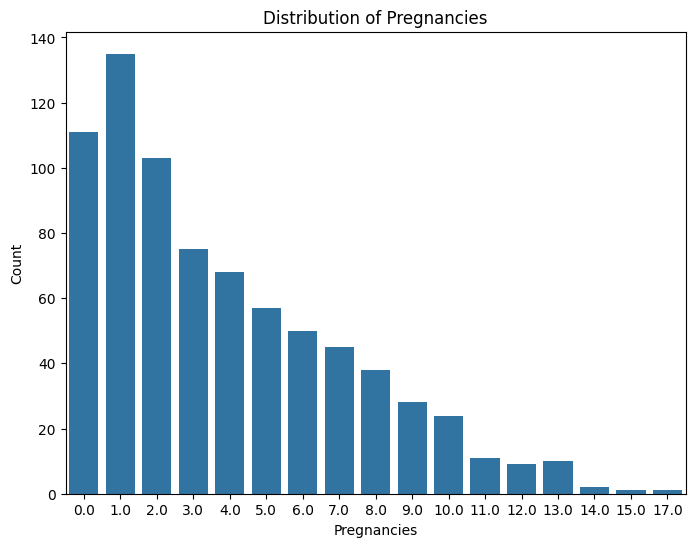

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pregnancies',data=df)
plt.title('Distribution of Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.show()

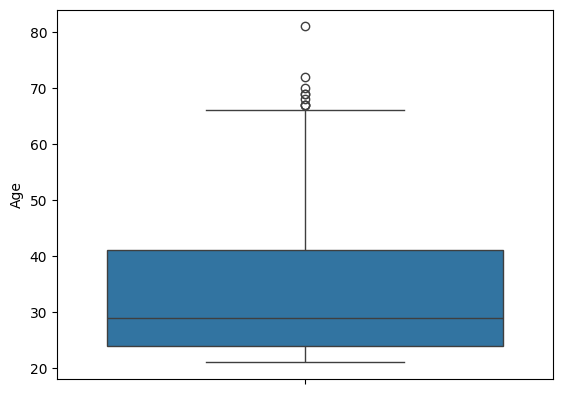

In [32]:
sns.boxplot(df['Age'])
plt.show()

In [33]:
count_target = df['Outcome'].value_counts()
count_target

Outcome
0.0    500
1.0    268
Name: count, dtype: int64

C:\Users\Zone\AppData\Local\Temp\ipykernel_2396\4035605196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_target.index,y=count_target.values,palette='Set2')


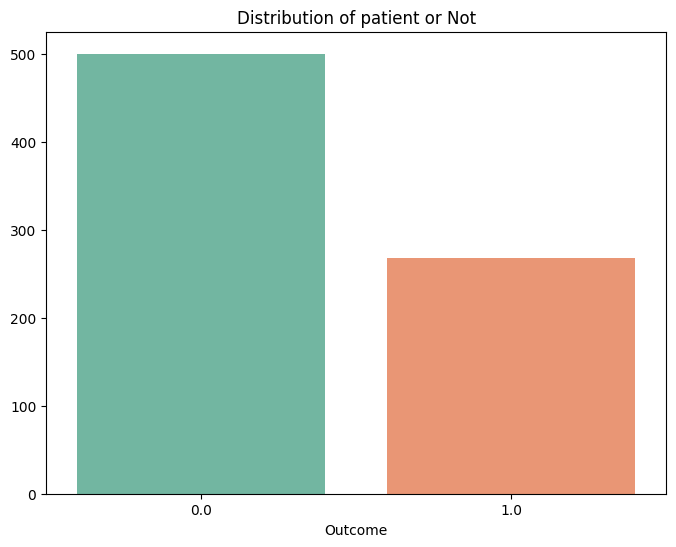

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=count_target.index,y=count_target.values,palette='Set2')
plt.title('Distribution of patient or Not')
plt.show()

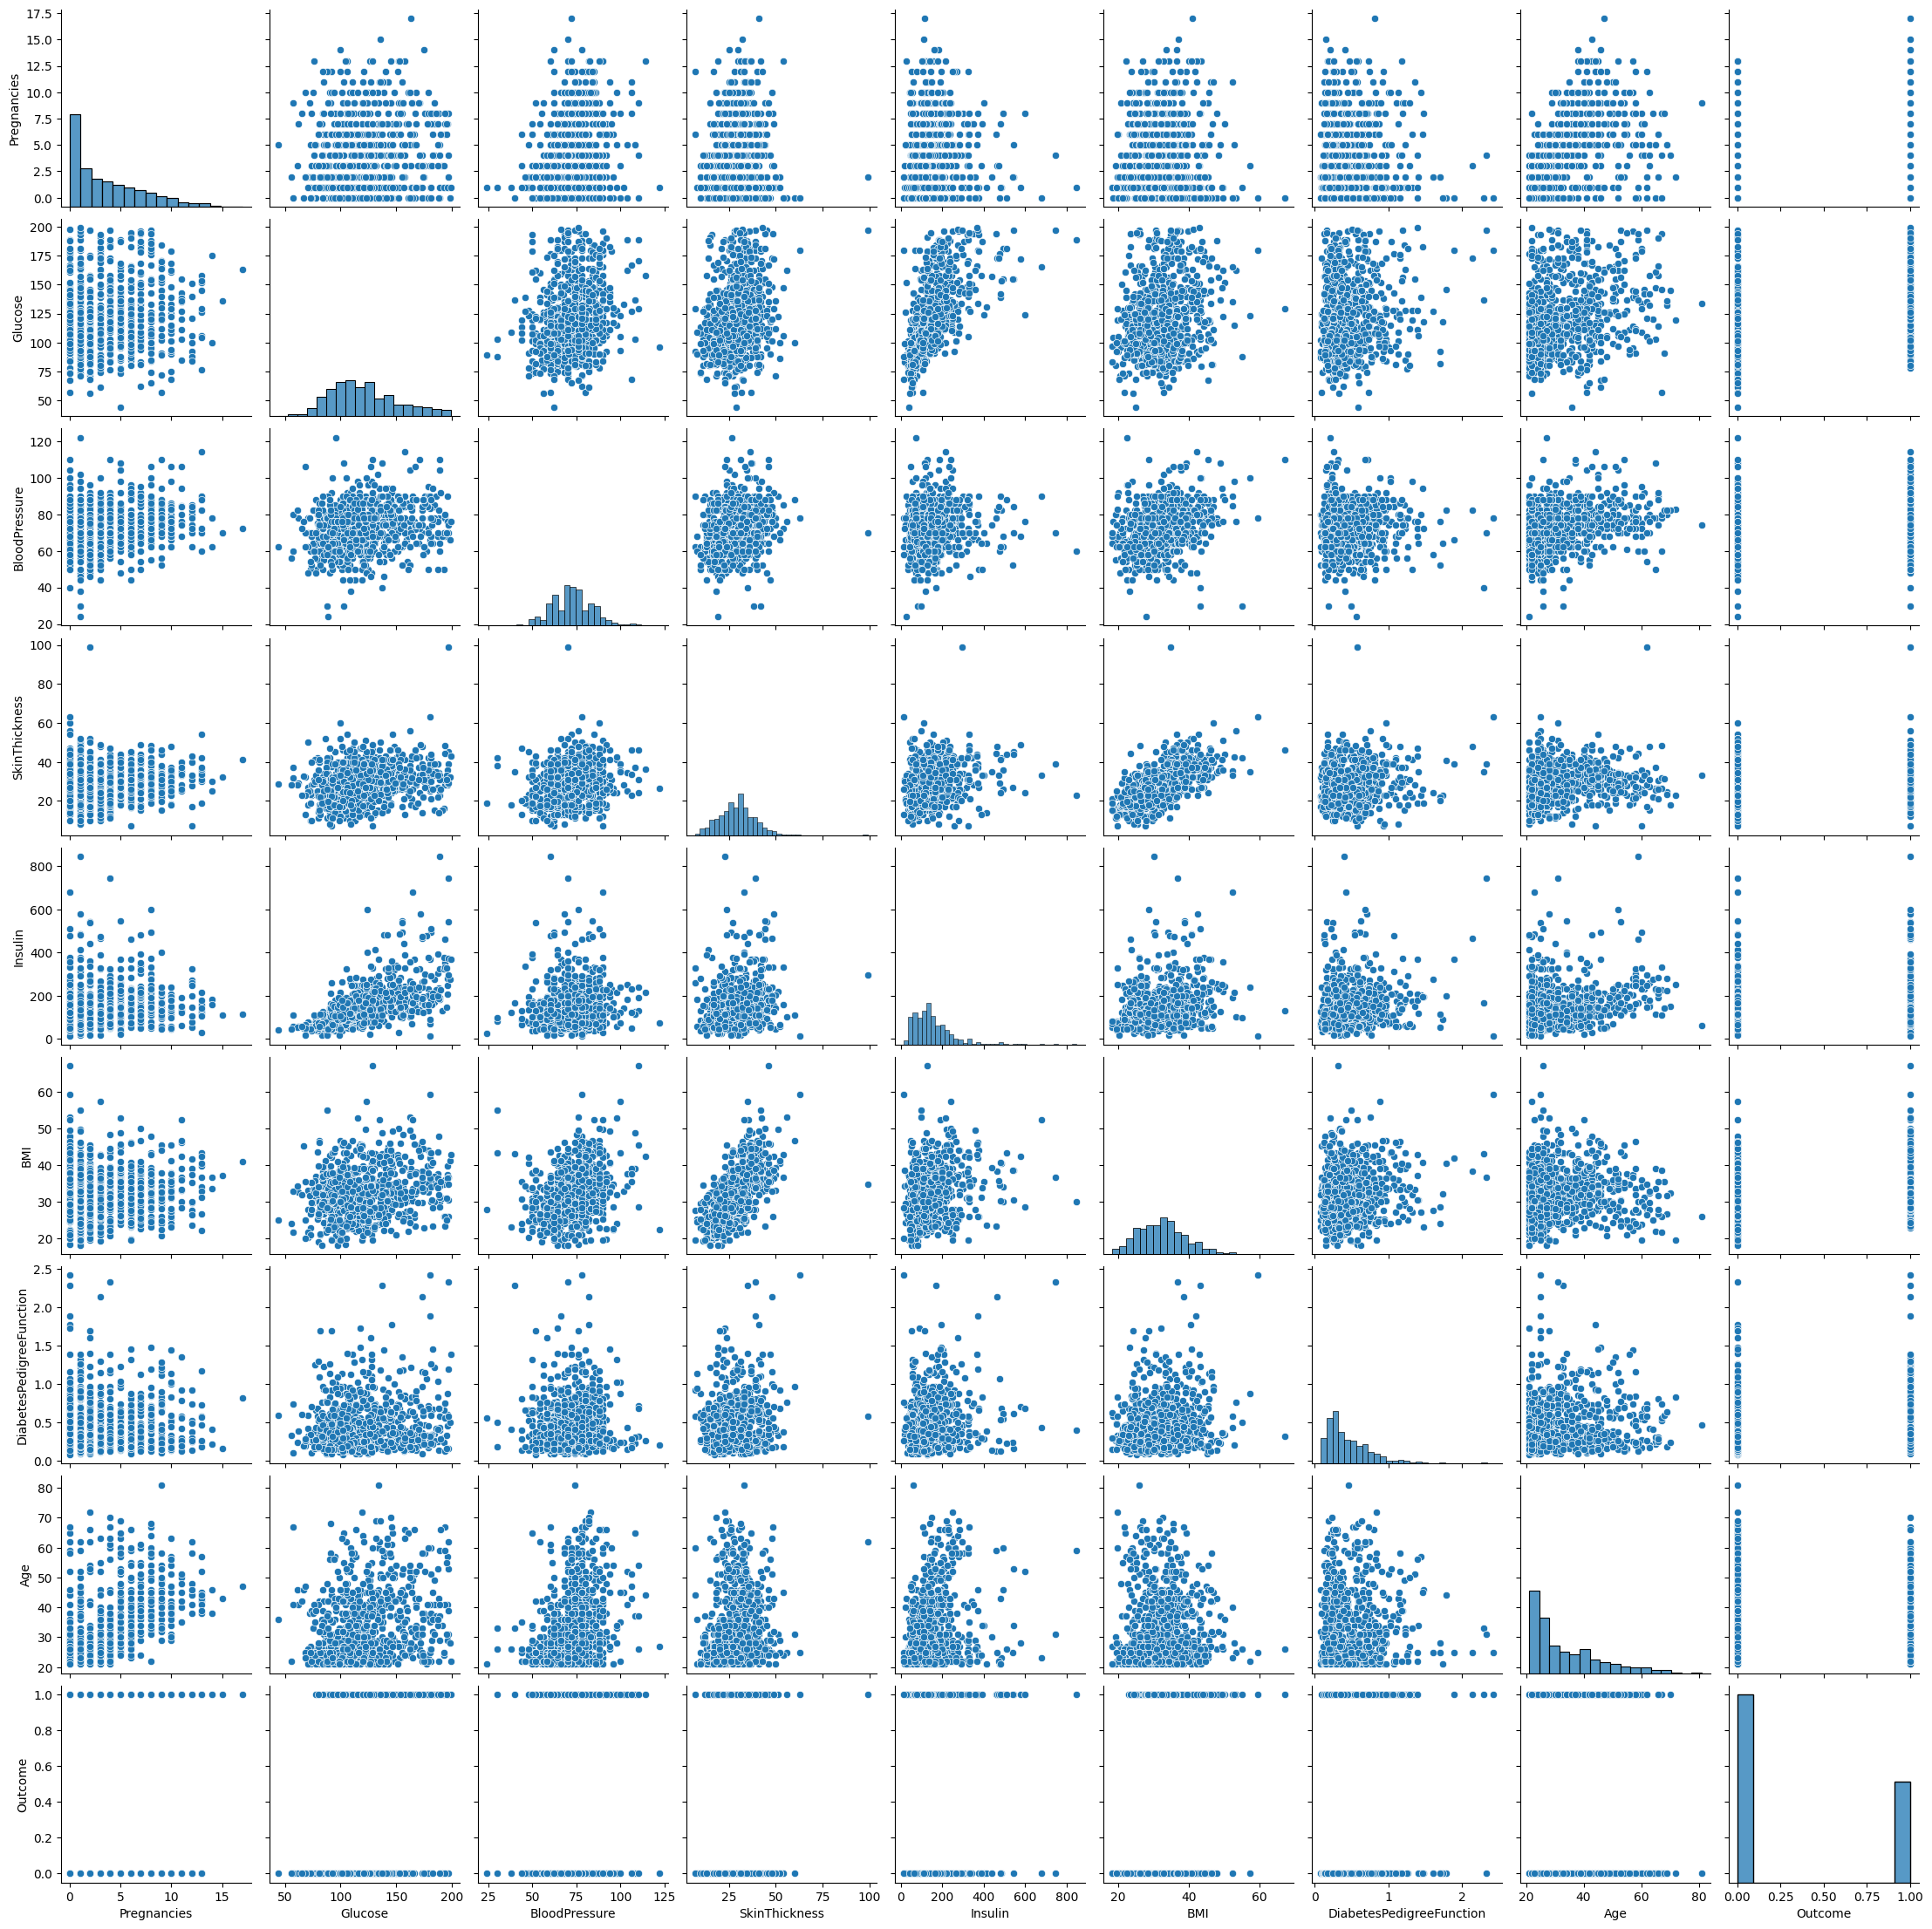

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.131230,0.218327,0.102406,0.061377,0.023323,-0.033523,0.544341,0.221898
Glucose,0.131230,1.000000,0.233992,0.246807,0.628432,0.238457,0.139226,0.270115,0.495853
BloodPressure,0.218327,0.233992,1.000000,0.230225,0.134373,0.294618,0.006323,0.337930,0.176665
SkinThickness,0.102406,0.246807,0.230225,1.000000,0.245197,0.639370,0.113957,0.149474,0.279530
Insulin,0.061377,0.628432,0.134373,0.245197,1.000000,0.251185,0.139713,0.237708,0.320151
BMI,0.023323,0.238457,0.294618,0.639370,0.251185,1.000000,0.155259,0.029817,0.313882
DiabetesPedigreeFunction,-0.033523,0.139226,0.006323,0.113957,0.139713,0.155259,1.000000,0.033561,0.173844
Age,0.544341,0.270115,0.337930,0.149474,0.237708,0.029817,0.033561,1.000000,0.238356
Outcome,0.221898,0.495853,0.176665,0.279530,0.320151,0.313882,0.173844,0.238356,1.000000


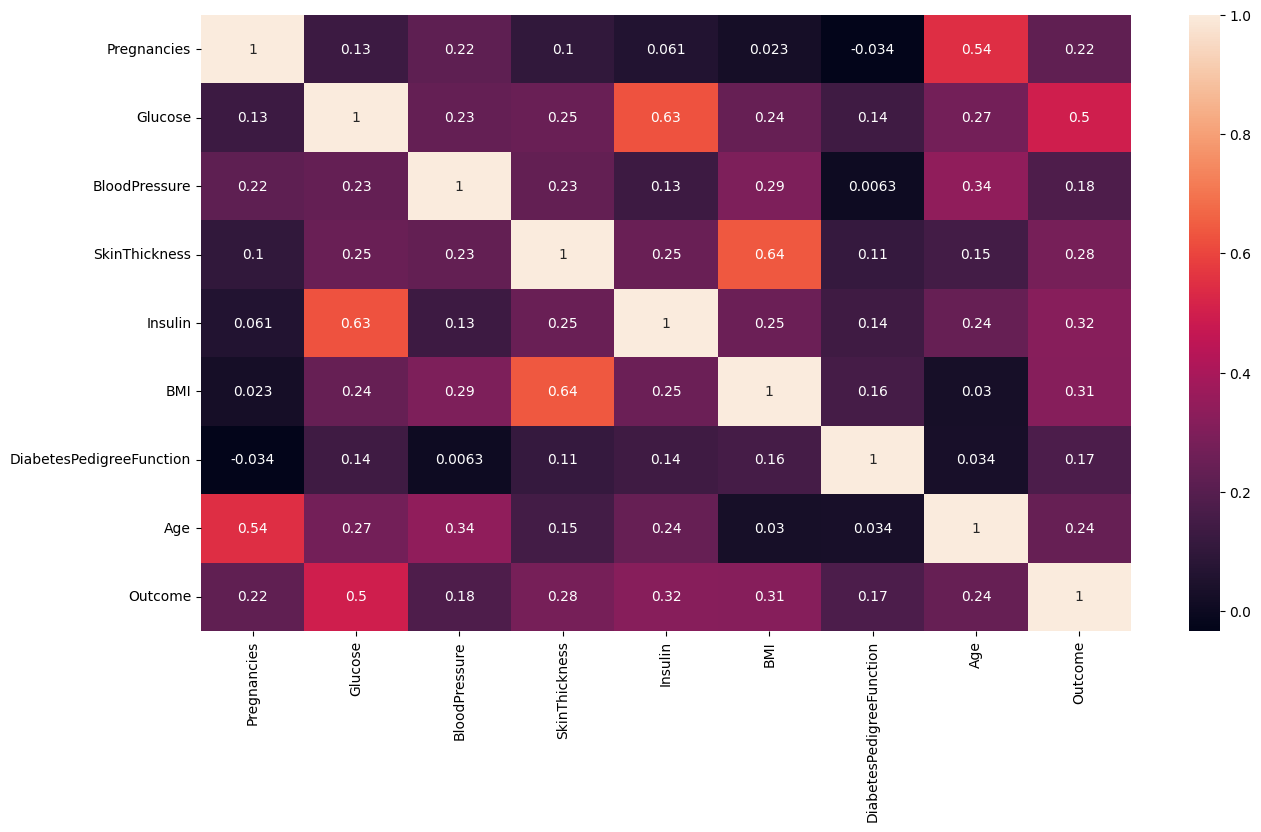

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Build Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


In [64]:
X = df.drop('Outcome', axis=1)  
y = df['Outcome']

print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.0  33.6   
1            1.0     85.0           66.0           29.0     58.6  26.6   
2            8.0    183.0           64.0           25.8    164.6  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    165.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           35.2    134.2  30.1   
767          1.0     93.0           70.0           31.0     66.6  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Display the results
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Diabetes', 'Diabetes'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    return accuracy 

## LogisticRegression

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

d:\Machine learning_Computer Vision_GenAI projects\Diabetes_Prediction\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic Regression Accuracy: 0.79
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        99
         1.0       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



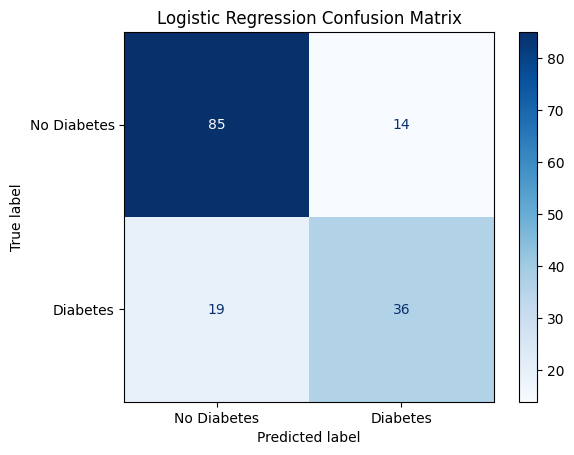

0.7857142857142857

In [45]:
log_reg_accuracy =evaluate_model(log_reg, X_test, y_test, 'Logistic Regression')
log_reg_accuracy

## SVC

In [46]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

Support Vector Classifier Accuracy: 0.76
Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82        99
         1.0       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



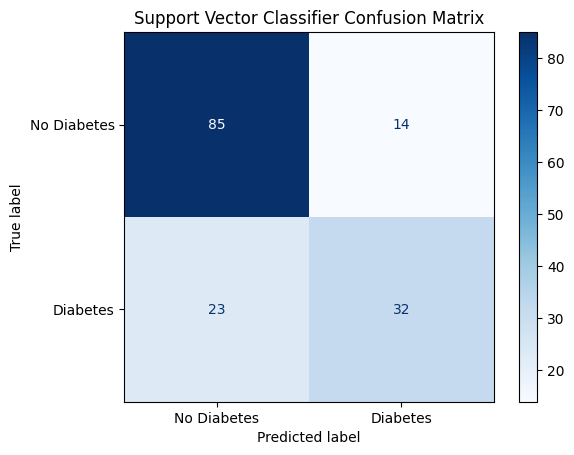

0.7597402597402597

In [47]:
svc_accuracy =evaluate_model(svc, X_test, y_test, 'Support Vector Classifier')
svc_accuracy

## RandomForest

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Classifier Accuracy: 0.71
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77        99
         1.0       0.59      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.72      0.71      0.72       154



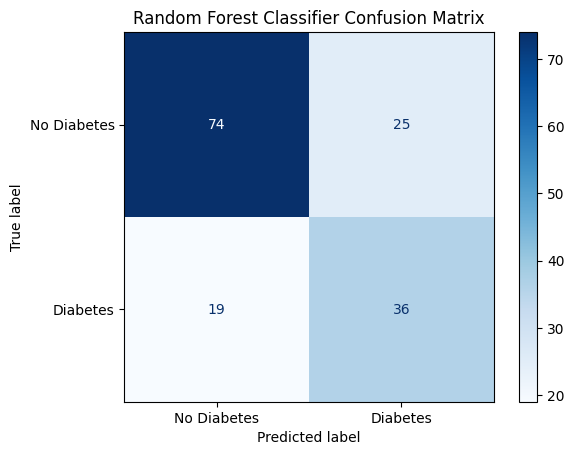

0.7142857142857143

In [49]:
rf_accuracy= evaluate_model(rf, X_test, y_test, 'Random Forest Classifier')
rf_accuracy

## GradientBoosting

In [50]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

Gradient Boosting Classifier Accuracy: 0.74
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79        99
         1.0       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



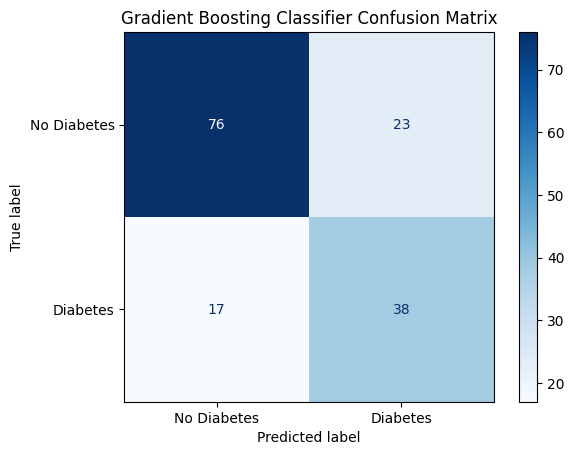

0.7402597402597403

In [59]:
gbc_accuracy = evaluate_model(gbc, X_test, y_test, 'Gradient Boosting Classifier')
gbc_accuracy

## Hyperparameter Search for LogReg

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],         # Regularization type
    'solver': ['liblinear']          # Solver for optimization
}


In [53]:
log_reg = LogisticRegression()

In [54]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [55]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [56]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


Optimized Logistic Regression Accuracy: 0.77
Optimized Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82        99
         1.0       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



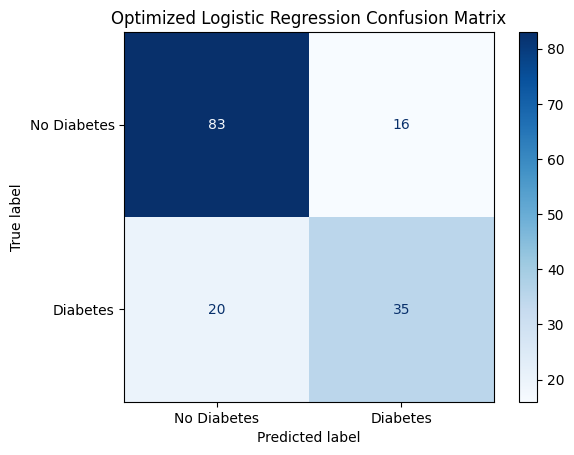

0.7662337662337663

In [57]:
best_log_reg = grid_search.best_estimator_
optimized_log_reg_accuracy =evaluate_model(best_log_reg, X_test, y_test, 'Optimized Logistic Regression')
optimized_log_reg_accuracy

## Accurracies

In [60]:
algorithms = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest', 'Gradient Boosting', 'Optimized Logistic Regression']
accuracies = [log_reg_accuracy, svc_accuracy, rf_accuracy, gbc_accuracy, optimized_log_reg_accuracy]

results_df = pd.DataFrame({'Algorithms': algorithms, 'Accuracies': accuracies})


results_df

,Algorithms,Accuracies
0,Logistic Regression,0.785714
1,Support Vector Classifier,0.759740
2,Random Forest,0.714286
3,Gradient Boosting,0.740260
4,Optimized Logistic Regression,0.766234


In [61]:
import pickle

In [63]:

with open('diabetes_analysis_model.pkl', 'wb') as f:
    pickle.dump(best_log_reg, f)

print("Model saved successfully!")

Model saved successfully!
